# Performance speed

In [1]:
#libs
import os
import re
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import glob
import math

In [12]:
def find_txt_files(folder_path):
    
    # This list will store the paths of .txt files
    txt_files_paths = []
    
    # Check for .txt files in the root folder
    txt_files_paths.extend(glob.glob(os.path.join(folder_path, '*.txt')))
    
    # Get all items in the root folder
    for item in os.listdir(folder_path):
        # Construct the full path of the item
        item_path = os.path.join(folder_path, item)
        # Check if this item is a directory and not in the exclude list
        if os.path.isdir(item_path):
            # If it's a directory, search for .txt files in it
            try:
                txt_files_paths.extend(glob.glob(os.path.join(item_path, '*.txt')))
            except:
                pass
    
    return txt_files_paths

In [13]:
dir3C280 = r"L:\everyone\sharedDATA\RawDATA\3C280"
txt_path_list_3C280 = find_txt_files(dir3C280)


In [14]:
txt_path_list_3C280

['L:\\everyone\\sharedDATA\\RawDATA\\3C280\\3C280_S08_NoRec\\ArduinoCodeUsed.txt',
 'L:\\everyone\\sharedDATA\\RawDATA\\3C280\\3C280_S08_NoRec\\RC280_SocialPokeTraining_v4_s1.txt',
 'L:\\everyone\\sharedDATA\\RawDATA\\3C280\\3C280_S09_240214_165658\\3C280_S09_240214_165658.txt',
 'L:\\everyone\\sharedDATA\\RawDATA\\3C280\\3C280_S10_240215_160245\\3C280_S10_240215_160245.txt',
 'L:\\everyone\\sharedDATA\\RawDATA\\3C280\\3C280_S10_240215_172644\\3C280_S10_240215_172644.txt',
 'L:\\everyone\\sharedDATA\\RawDATA\\3C280\\3C280_S11_240216_144029\\3C280_S11_240216_144029.txt',
 'L:\\everyone\\sharedDATA\\RawDATA\\3C280\\3C280_S11_240216_162247\\3C280_S11_240216_162247.txt',
 'L:\\everyone\\sharedDATA\\RawDATA\\3C280\\3C280_S13_240219_163833\\3C280_S13_240219_163833.txt',
 'L:\\everyone\\sharedDATA\\RawDATA\\3C280\\3C280_S13_240219_173540\\3C280_S13_240219_173540.txt',
 'L:\\everyone\\sharedDATA\\RawDATA\\3C280\\3C280_S14_240220_134126\\3C280_S14_240220_134126.txt',
 'L:\\everyone\\sharedDATA\

In [15]:
def duration_20t(file_path, trial_numbers=[1,21]): # How long a mouse performed 20 trials
    trial_1_21 = []

    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if len(parts) >= 2:
                try:
                    try:
                        pattern = "%H:%M:%S.%f"
                        timestamp = datetime.strptime(parts[0], pattern)
                        event = parts[1]
                    except:
                        pattern = "%H:%M:%S"
                        timestamp = datetime.strptime(parts[0], pattern)
                        event = parts[1]
                except:
                    continue
                
                for i in range(len(trial_numbers)):
                    if f'Start Trial # {trial_numbers[i]} ' in event:
                        trial_1_21.append(timestamp)

    duration_t1_t21 = trial_1_21[1] - trial_1_21[0]
    duration_t1_t21 = duration_t1_t21.total_seconds() / 60

    return duration_t1_t21 #in mins

In [16]:
file_path = r'L:\\everyone\\sharedDATA\\RawDATA\\3C280\\3C280_S34_240319_111247\\3C280_S34_240319_111247.txt'
tr_dur = duration_20t(file_path)
tr_dur

6.359033333333333

In [19]:
def blocks_matrix(txt_files_paths):
    blocks_matrix = []
    s_x = []

    txt_files_paths.append('L:\\everyone\\sharedDATA\\RawDATA\\3C280\\3C280_S34_240319_111247\\3C280_S34_240319_111247.txt')
    try:
        for path in txt_files_paths:
            try:
                match = re.search(r'_S(\d+)_', path)
                number = match.group(1)
                if number not in s_x:
                    try:
                        blocks_matrix.append(s_x)
                        s_x=[]
                        s_x.append(number)
                        s_x.append(duration_20t(path))
                    except:
                        continue
                else:
                    s_x.append(duration_20t(path))
            except:
                pass

        max_len = 5 # s_nb, block1,2,3,4
        for sublist in blocks_matrix:
            while len(sublist) < max_len:
                sublist.append(np.nan)
        
        blocks_matrix = np.array(blocks_matrix)[1:,:]
        blocks_matrix = blocks_matrix.astype(float)
    except:
        pass
    return blocks_matrix


In [20]:
blocks_matrix_3C280 = blocks_matrix(txt_path_list_3C280)

In [21]:
blocks_matrix_3C280

[[nan, nan, nan, nan, nan],
 ['08', nan, nan, nan, nan],
 ['09', nan, nan, nan, nan],
 ['10', nan, nan, nan, nan],
 ['11', nan, nan, nan, nan],
 ['13', 36.11246666666667, nan, nan, nan],
 ['14', nan, nan, nan, nan],
 ['15', nan, nan, nan, nan],
 ['16', 23.51578333333333, 50.13601666666667, nan, nan],
 ['17', 37.852533333333334, nan, nan, nan],
 ['18', 22.463733333333334, nan, nan, nan],
 ['19', 14.7382, 26.938433333333332, 30.3132, 63.365249999999996],
 ['20', 15.89185, 19.54695, nan, nan],
 ['21', 32.40595, 23.203950000000003, 36.38601666666667, 33.37088333333333],
 ['22', 11.02835, 33.928783333333335, 34.768433333333334, 60.87316666666666],
 ['23', 17.5197, nan, nan, nan],
 ['24', 5.816833333333333, 32.630183333333335, nan, nan],
 ['25', 8.0045, 19.298099999999998, nan, nan],
 ['27', 8.238083333333334, 19.12858333333333, 40.39528333333333, nan],
 ['28',
  31.630499999999998,
  10.288766666666668,
  26.355483333333332,
  37.61978333333333],
 ['29',
  7.204883333333333,
  20.7703666666

In [26]:
import pandas as pd

In [51]:
# Filter out sublists that are not of length 5 or contain NaN
filtered_data = [sublist for sublist in blocks_matrix_3C280 if len(sublist) == 5 and not any(pd.isna(value) for value in sublist)]
    
# Convert the filtered data to a matrix (numpy array)
matrix = np.array(filtered_data)

# Convert elements from index 1 to 4 to integers
new = np.zeros(matrix.shape)
for row in range(len(matrix)):
    for i in range(5):
        new[row, i] = int(matrix[row, i])

matrix = new
# Display the matrix
print(matrix)

[[19. 14. 26. 30. 63.]
 [21. 32. 23. 36. 33.]
 [22. 11. 33. 34. 60.]
 [28. 31. 10. 26. 37.]
 [29.  7. 20. 11. 25.]
 [30.  6. 24.  9. 22.]
 [31.  5. 17. 29. 26.]
 [32.  9. 19. 19. 19.]
 [33.  5. 12. 11. 22.]
 [34.  6. 12. 10. 11.]
 [35.  6. 24. 23. 19.]
 [36.  8. 36. 11. 35.]
 [38.  9. 25. 16. 50.]
 [43. 16. 32. 26. 44.]
 [44.  2.  3. 21. 11.]]


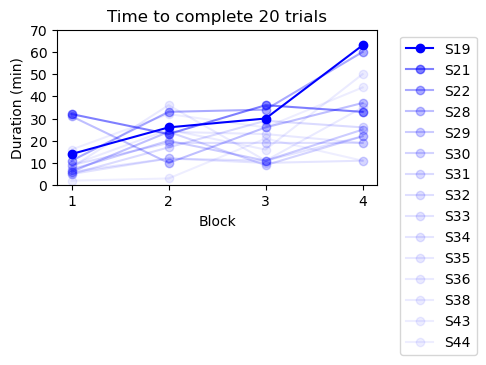

In [53]:
plt.figure(figsize=(5,3))
for ses in range(len(matrix)):
    session_name = matrix[ses,0]
    plt.plot(matrix[ses,1:], marker='o', label=f"S{int(session_name)}", color='blue', alpha=1/(ses+1))
plt.xlabel('Block')
plt.ylabel('Duration (min)')
plt.title(f'Time to complete 20 trials')
plt.legend()
plt.xticks([0,1, 2, 3], [1, 2, 3, 4])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0,70)
plt.yticks([0,10,20,30,40,50,60,70], [0,10,20,30,40,50,60,70])
plt.tight_layout()
plt.show() 